# CLUSTERING

### STEP 1 : IMPORTING ALL LIBRARIES

In [1]:
#Import all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime,timedelta


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Step 2 : Reading Data

In [3]:
#Reading data 
country_df = pd.read_csv('country-data.csv',encoding='utf-8')

In [4]:
#Check the head of data frame
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Step3 : Data inspection

In [5]:
#Shape
country_df.shape

(167, 10)

Dataset has 167 rows and 10 columns

In [6]:
#Info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#Describe
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Check data types of each columns
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

1. Columns have relevent data types.
2. No need to convert columns data types.

## Step 4: Data Check - Missing values

In [9]:
#Check number of missing values : (info() check already says that there are no missing values)

null_values = country_df.isna().sum()
null_values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

1. There are no null/missing values
2. Missing value treatment is not required

## Step 5 : Data Visualization

#### Use pairplot and Heatmap to find multicolinearity

In [10]:
#Change columns - imports,exports and health percenatage of total GDP into per total GDPP
country_df['imports'] = (country_df['imports']*country_df['gdpp'])/100
country_df['exports'] = (country_df['exports']*country_df['gdpp'])/100
country_df['health'] = (country_df['health']*country_df['gdpp'])/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


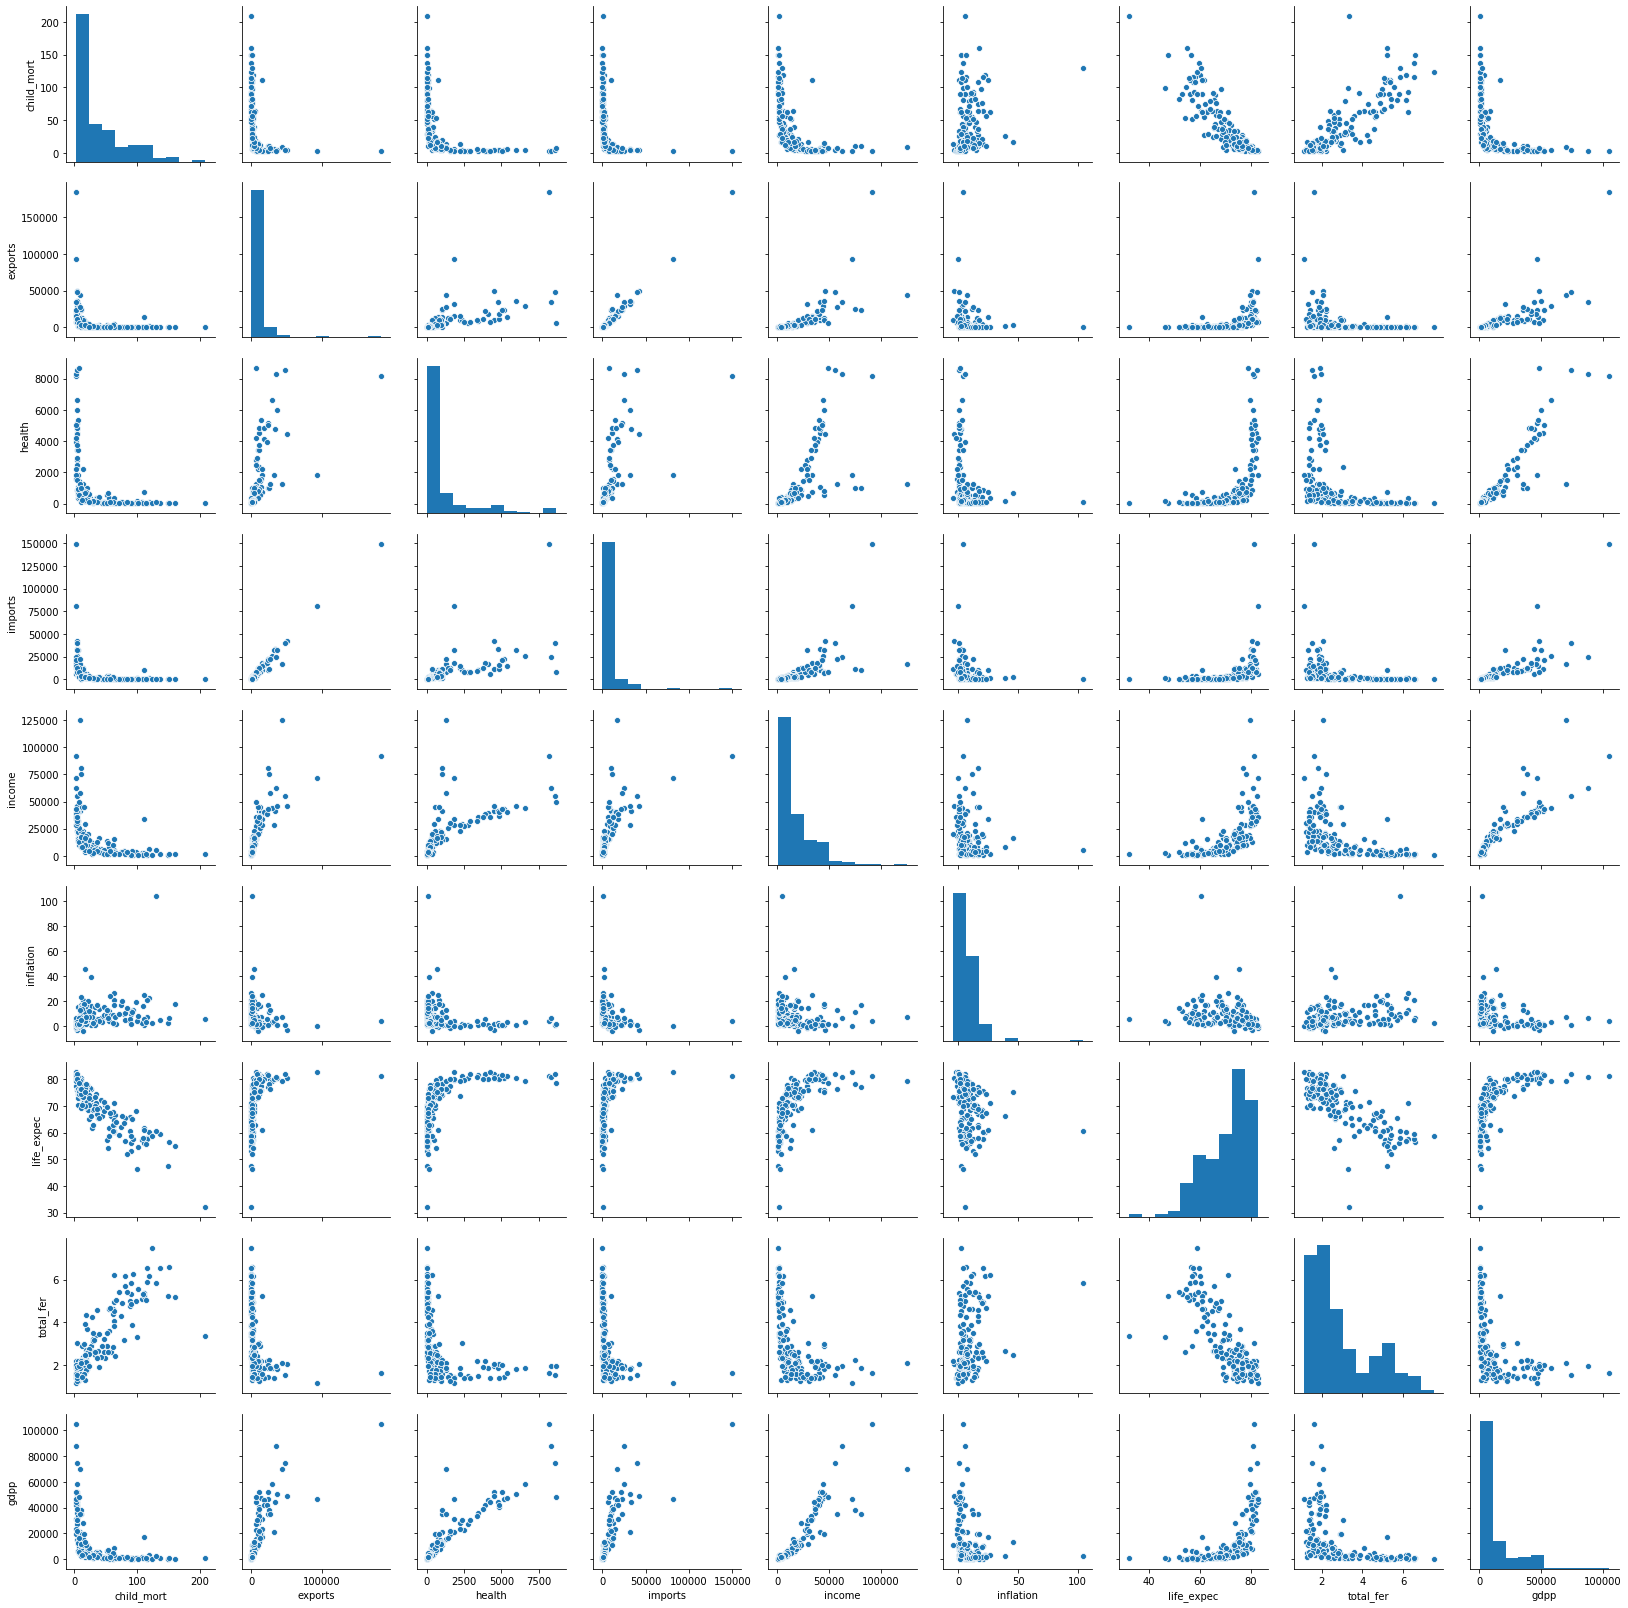

In [11]:
#Pairplot for numerical values
sns.pairplot(country_df)
plt.show()

In [12]:
#Corr()
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


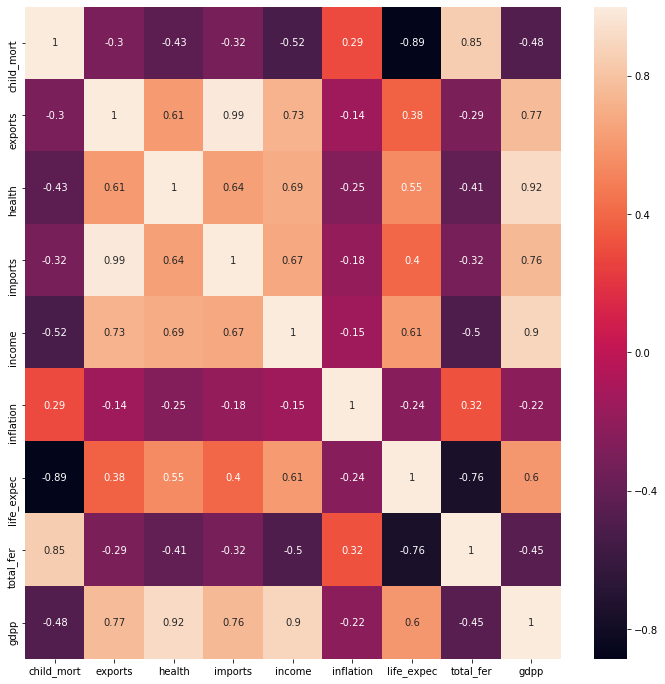

In [14]:
#Heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(country_df.corr(),annot=True)


As shown above, after checking corr(), few colums are highly correlated and can be dropped
1. imports and exports are highly correlated - 0.74
2. total_fertility and child_mortality are highly corelated - 0.85
3. total_fertility and life_expectency are highly correlated - -0.76
4. life_expectency and child_mortality are highly correlated - -0.89

We have multicolinearity problem. But we can not drop the columns and lose the information. We can do PCA here to get rid of this problem.

## Step 6 : Data Preparation - Rescaling

In [17]:
#Take only numerical columns
country_drop_country = country_df.copy()
country = country_drop_country.pop('country')

In [18]:
country_drop_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
#Import library StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
country_df_scaled = scaler.fit_transform(country_drop_country)
country_df_scaled = pd.DataFrame(country_df_scaled, columns=country_drop_country.columns)
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Step 7 : PCA

In [21]:
#Importing PCA 
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(country_df_scaled)

PCA(random_state=42, svd_solver='randomized')

In [22]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [23]:
#Variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Varience Ratio')

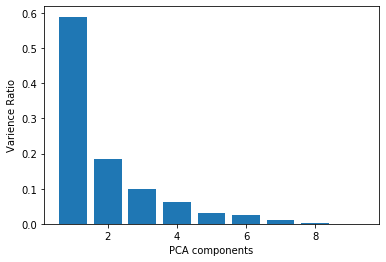

In [24]:
#Variance ratio bar plot
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel("PCA components")
plt.ylabel("Varience Ratio")

1. First component varience is more than 50%
2. Second component varience is approximately 20%

Text(0, 0.5, 'Cumulative Explained Varience')

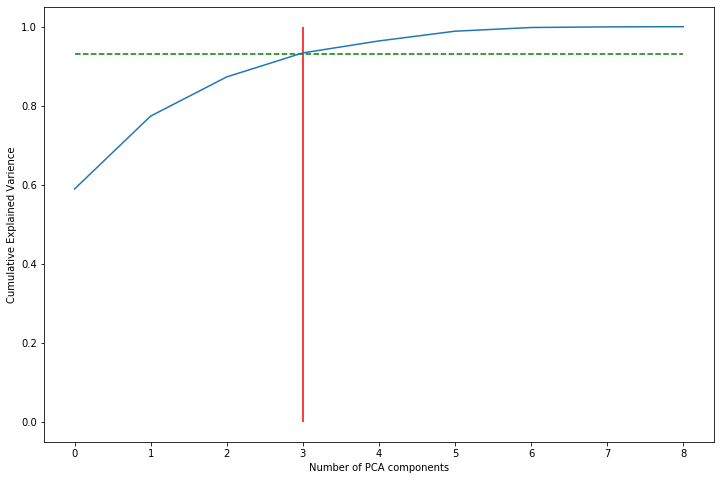

In [25]:
#Plot to visualize cumulative variance against number of components
fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3,ymax=1,ymin=0,colors='r')
plt.hlines(y=0.93,xmax=8,xmin=0,colors='g',linestyles='--')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Varience')

From the above plot, more than 90% variance is explained by first 3 principal components. We can use these components for furthur analysis

In [26]:
#Checking which attributes are explained well
pca_cols = list(country_df_scaled.columns)
pca_attributes = pd.DataFrame({'Attribute':pca_cols,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [27]:
pca_attributes

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


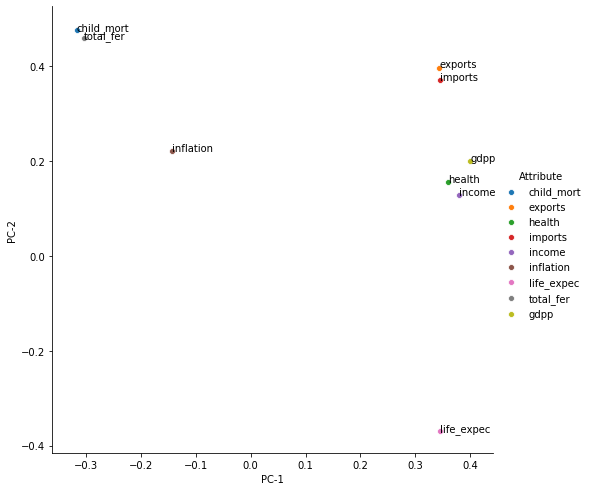

In [28]:
#plotting pc1 , pc2
sns.pairplot(data=pca_attributes,x_vars=['PC_1'],y_vars=['PC_2'],hue='Attribute',height=7)
plt.xlabel('PC-1')
plt.ylabel('PC-2')

for i,j in enumerate(pca_attributes.Attribute):
    plt.annotate(j,(pca_attributes.PC_1[i],pca_attributes.PC_2[i]))

1. Inflation is neither explained by PC1 nor PC2
2. Imports Exports explained by both PCs
3. Child mortality, total fertility explained by PC2
4. life_expectency, income, health, gpdd are explained by PC1

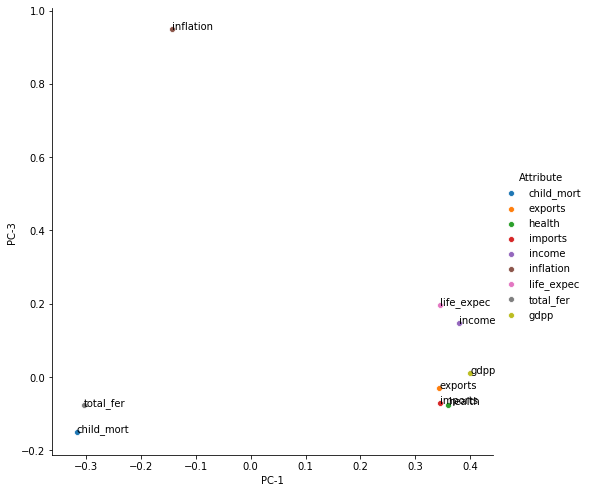

In [29]:
#Plotting pc1 and pc3
sns.pairplot(data=pca_attributes,x_vars=['PC_1'],y_vars=['PC_3'],hue='Attribute',height=7)
plt.xlabel('PC-1')
plt.ylabel('PC-3')

for i,j in enumerate(pca_attributes.Attribute):
    plt.annotate(j,(pca_attributes.PC_1[i],pca_attributes.PC_3[i]))

1. Inflation is exxplained by PC3

Approximately 90% of varience explained by pc 1,2,3. We can build model with these three components

In [30]:
# Building dataframe using incremental PCA 

#Import libray
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pca_increment = IncrementalPCA(n_components=3)

In [31]:
pca_incremental = pca_increment.fit_transform(country_df_scaled)
pca_incremental

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [32]:
country_df.reset_index()
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [33]:
#New data frame with these componenets
pca_component = pd.DataFrame(pca_incremental,columns=['PC_1','PC_2','PC_3'])
pca_components = pd.concat([country,pca_component],axis=1)

In [34]:
pca_components

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
5,Argentina,0.037197,-0.680889,1.466963
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877
8,Austria,3.815682,0.256083,-0.270495
9,Azerbaijan,-0.467515,-0.493492,0.603288


In [35]:
# Check for corr() again
pca_components.corr()

,PC_1,PC_2,PC_3
PC_1,1.000000,0.001269,-0.001251
PC_2,0.001269,1.000000,-0.001879
PC_3,-0.001251,-0.001879,1.000000


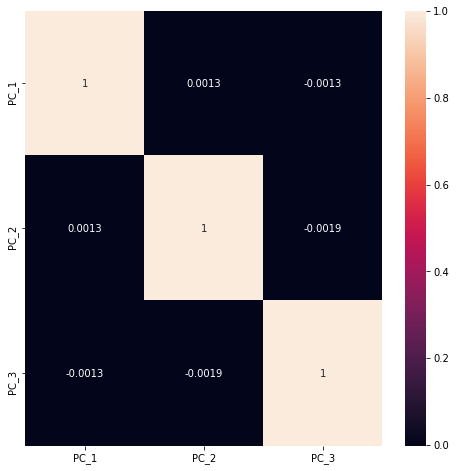

In [36]:
# Plot heatmap
plt.figure(figsize=(8,8))
ax=sns.heatmap(pca_components.corr(),annot=True)


The correlation between components is approaching 0. We can proceed with this.

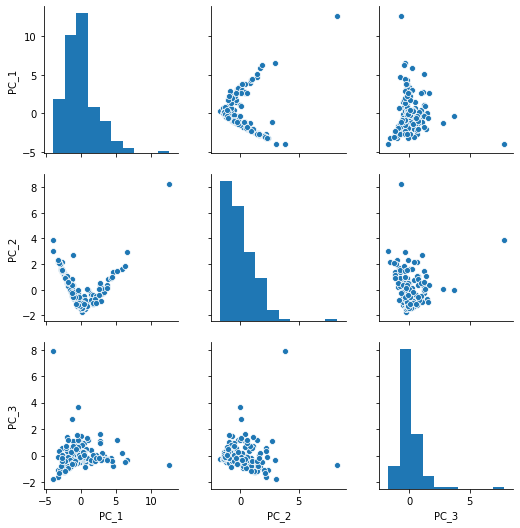

In [37]:
#Pair plot
sns.pairplot(pca_components)
plt.show()


## Step 8 : Outlier Treatment

[]

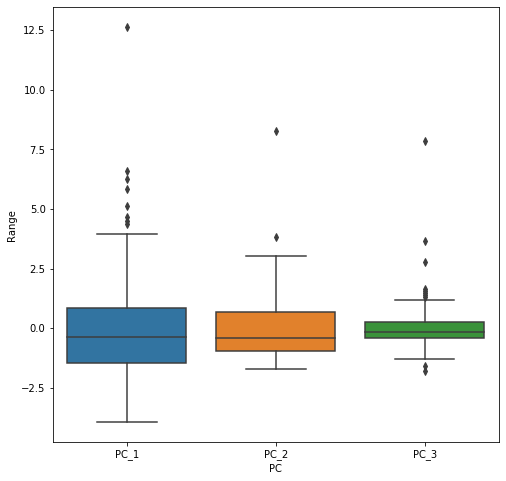

In [38]:
#Box plot to understand outliers
outliers_pca = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=pca_components[outliers_pca])
plt.xlabel("PC")
plt.ylabel('Range')
plt.plot()

In [39]:
#Describe
pca_components.describe()

,PC_1,PC_2,PC_3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.127373e-17,1.329608e-18,2.925139e-17
std,2.310042e+00,1.292295e+00,9.467202e-01
min,-3.944960e+00,-1.696969e+00,-1.791111e+00
25%,-1.446673e+00,-9.783466e-01,-3.974440e-01
50%,-3.567044e-01,-3.984503e-01,-1.740323e-01
75%,8.505467e-01,6.782430e-01,2.604698e-01
max,1.264435e+01,8.265266e+00,7.866491e+00


In [40]:
#Statistical outliers removal

#For PC_1

Q1 = pca_components.PC_1.quantile(0.05)
Q3 = pca_components.PC_1.quantile(0.95)
IQR = Q3 - Q1

pca_components = pca_components[(pca_components.PC_1 >= Q1) & (pca_components.PC_1 <= Q3)]

#For PC_2

Q1 = pca_components.PC_2.quantile(0.05)
Q3 = pca_components.PC_2.quantile(0.95)
IQR = Q3 - Q1

pca_components = pca_components[(pca_components.PC_2 >= Q1) & (pca_components.PC_2 <= Q3)]

#For PC_3

Q1 = pca_components.PC_3.quantile(0.05)
Q3 = pca_components.PC_3.quantile(0.95)
IQR = Q3 - Q1

pca_components = pca_components[(pca_components.PC_3 >= Q1) & (pca_components.PC_3 <= Q3)]

In [41]:
pca_components.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
2,Algeria,-0.457626,-0.673301,0.961867
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877


In [42]:
pca_components.describe()

,PC_1,PC_2,PC_3
count,119.000000,119.000000,119.000000
mean,0.078894,-0.428953,-0.024848
std,1.608601,0.690837,0.490720
min,-2.637442,-1.362135,-0.873885
25%,-1.103105,-0.999010,-0.351330
50%,-0.302659,-0.550248,-0.146299
75%,0.953227,0.004942,0.255368
max,3.815682,1.469038,1.197851


[]

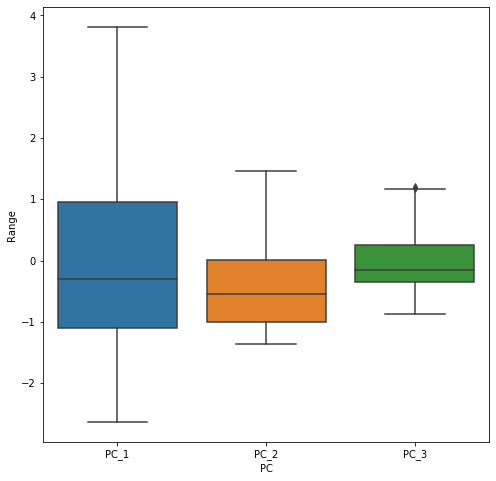

In [43]:
#Boxplot to check outliers
outliers_pca = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=pca_components[outliers_pca])
plt.xlabel("PC")
plt.ylabel('Range')
plt.plot()

In [44]:
#Reindexing
pca_components = pca_components.reset_index(drop=True)
pca_components_df = pca_components.drop(['country'],axis=1)
pca_components.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


## Step 10 : Hopkins Statistics test

In [45]:
#libraries to import
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [46]:
#Hopkins score to know if data is enogh for cluster
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [47]:
#Hopkins score:
#hopkins(pca_components_df)
#This changes each time we run, so it is commented

Got The value >80 which is really good

## Step 11 : Model building

### Using K-Means Clustering

#### Finding the optimal number of clusters : Elbow curve to get correct number of clusters

In [48]:
#Elbow curve method 

ec = []
for number_cluster in list(range(1,8)):
    model_cluster = KMeans(n_clusters=number_cluster,max_iter=50,random_state=100)
    model_cluster.fit(pca_components_df)
    ec.append(model_cluster.inertia_)

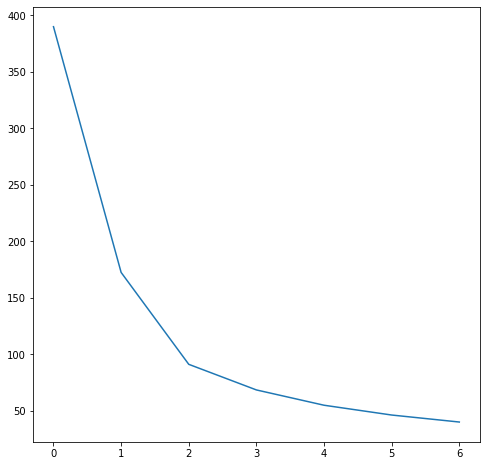

In [49]:
plt.plot(ec)
plt.show()

Looking at above curve, going with 4 to 5 clusters looks good

### Silhouette Analysis

In [50]:
range_clusters = [2,3,4,5,6,7,8]
for number_clusters in range_clusters:
    
    kmeans = KMeans(n_clusters=number_clusters, max_iter=50,random_state= 100)
    kmeans.fit(pca_components_df) 
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(pca_components_df, cluster_labels)
    print("For clusters={0}, the silhouette score is {1}".format(number_clusters, silhouette_avg))
 

For clusters=2, the silhouette score is 0.4873400103541441
For clusters=3, the silhouette score is 0.4639771456218248
For clusters=4, the silhouette score is 0.3987356568367148
For clusters=5, the silhouette score is 0.36085353704438133
For clusters=6, the silhouette score is 0.3714796089348357
For clusters=7, the silhouette score is 0.3609446319381151
For clusters=8, the silhouette score is 0.34963655749979905


In [51]:
#KMeans with 4 clusters
cluster_4 = KMeans(n_clusters=4,max_iter=70,random_state=100)
cluster_4.fit(pca_components_df)

KMeans(max_iter=70, n_clusters=4, random_state=100)

In [52]:
cluster_4.labels_

array([3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 1, 0,
       1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 3, 2, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3,
       1, 2, 2, 2, 0, 1, 1, 1, 3])

In [53]:
#Assign labels
pca_components['Cluster_Id'] = cluster_4.labels_
pca_components.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,3
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,2


In [54]:
pca_components['Cluster_Id'].value_counts()

1    48
0    29
3    23
2    19
Name: Cluster_Id, dtype: int64

There are enough number of countries in each clusters

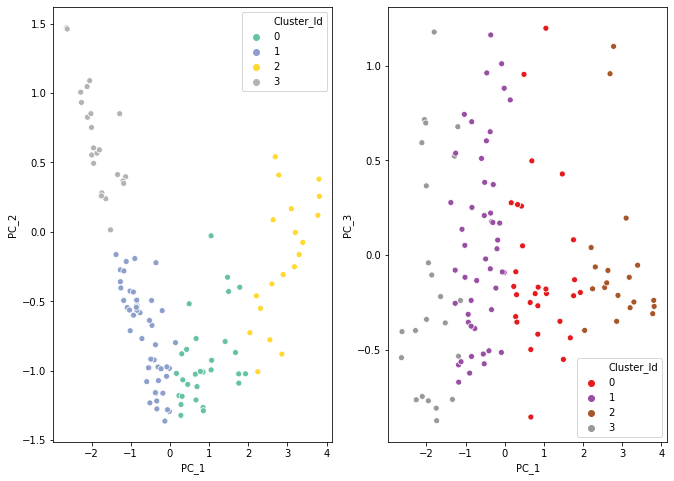

In [55]:
# Scatter plot to visualize
fig, axes = plt.subplots(1,2, figsize=(11,8))
sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',data=pca_components,ax=axes[0],palette="Set2")
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',data=pca_components,ax=axes[1],palette="Set1")
plt.show()

In first plot, intra-distance is more between cluster elements. <br>
It is not a good indication

In [56]:
#KMeans with 5 clusters
cluster_5 = KMeans(n_clusters=5,max_iter=70,random_state=100)
cluster_5.fit(pca_components_df)

KMeans(max_iter=70, n_clusters=5, random_state=100)

In [57]:
cluster_5.labels_

array([1, 0, 3, 0, 2, 2, 0, 3, 3, 4, 3, 0, 4, 4, 4, 1, 0, 0, 4, 2, 4, 0,
       0, 0, 1, 1, 3, 2, 3, 0, 0, 4, 0, 1, 3, 4, 2, 2, 1, 1, 0, 2, 1, 3,
       0, 4, 4, 3, 2, 4, 4, 0, 1, 3, 2, 0, 2, 4, 0, 1, 2, 4, 1, 3, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 4, 0, 4, 4, 1, 4, 2, 0, 1, 0, 0, 0, 4, 3, 3,
       0, 0, 1, 4, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 2, 4, 1, 4, 0, 0, 4, 1,
       0, 2, 2, 2, 0, 4, 4, 0, 1])

In [58]:
#Assign labels
pca_components['Cluster_Id'] = cluster_5.labels_
pca_components.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,2


In [59]:
pca_components['Cluster_Id'].value_counts()

0    35
4    25
1    23
3    19
2    17
Name: Cluster_Id, dtype: int64

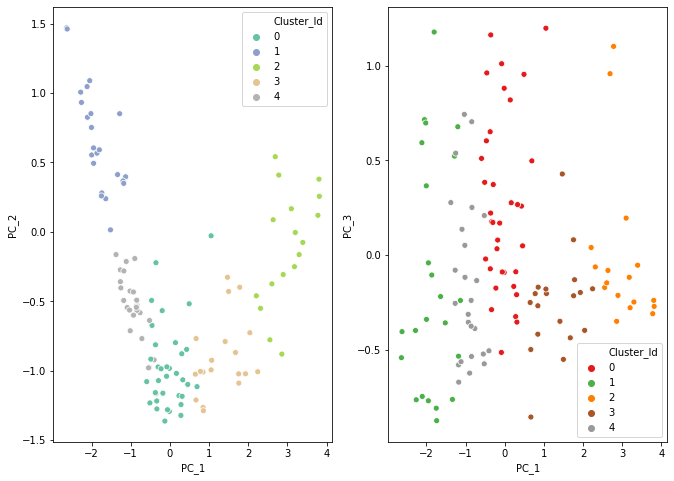

In [60]:
# Scatter plot to visualize
fig, axes = plt.subplots(1,2, figsize=(11,8))
sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',data=pca_components,ax=axes[0],palette="Set2")
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',data=pca_components,ax=axes[1],palette="Set1")
plt.show()

Looking at the graph, the problem is still existing

We will revisit the attributes to improvise the clusters

In [61]:
# Merging the dataframe with PCA, with original Dataframe

df_merge = pd.merge(country_df,pca_components,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating dataframe with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.900000,2934.328857,2790.207714,417.946200,14125.714286,8.258286,74.054286,2.085429,6943.428571
1,1,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.739130
2,2,5.141176,16736.111765,15324.935294,3954.500588,41705.882353,2.823647,80.476471,1.776471,40911.764706
3,3,6.900000,9200.489474,9445.805263,1489.787895,25036.842105,0.904789,76.957895,1.678947,18810.526316
4,4,37.216000,931.788741,1241.580044,130.351536,5442.800000,6.602040,69.232000,2.982000,2416.880000


In [62]:
df_merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


Income, GDPP, Child_mortality are three main attributes which strongly decides country growth. In PCA also we had good score for 3 components. We will take 3 components to build clusters

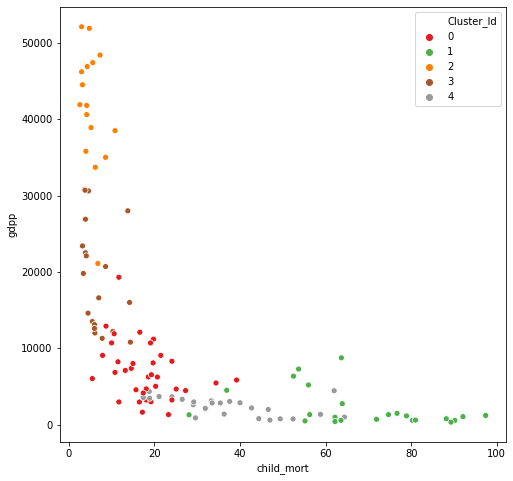

In [63]:
#Scatter plot to understand data spread
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1")
plt.show()

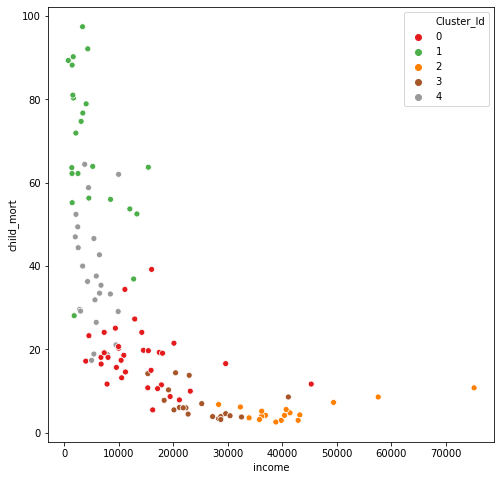

In [64]:
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")
plt.show()

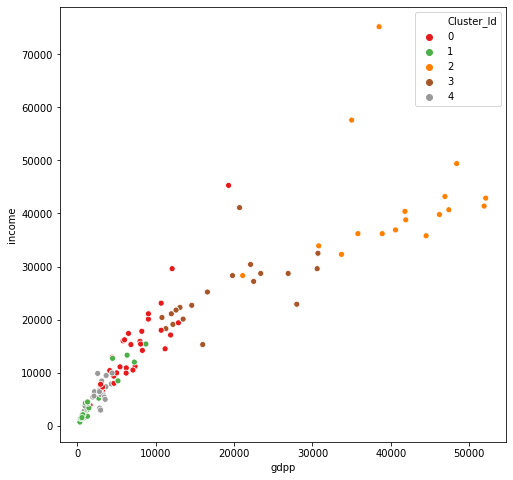

In [65]:
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1")
plt.show()

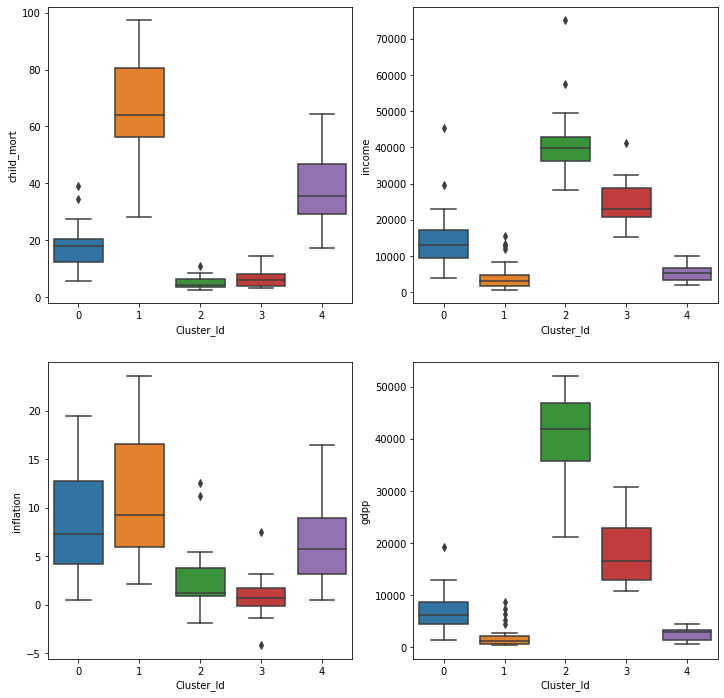

In [66]:
#Boxplot

fig, axes = plt.subplots(2,2, figsize=(12,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.show()

1. Child mortality id high in cluster 1 and cluster 4, which inferes that these countries need aid
2. GDPP and Income is less in cluster 1 and cluster 4, which inferes that these countries need aid

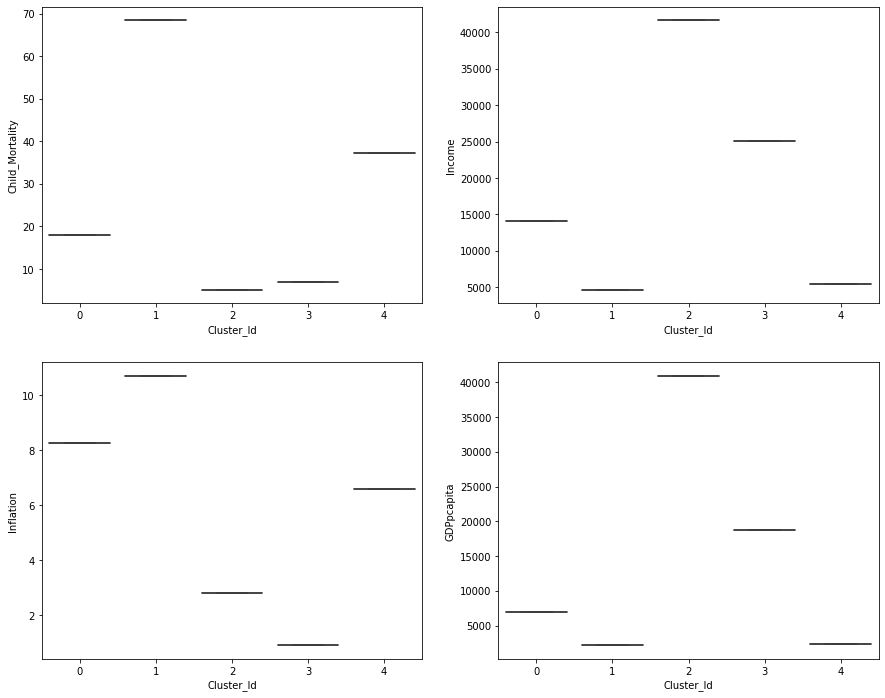

In [67]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

In [68]:
#List of countries with cluster 1 
df_merge_col[df_merge_col['Cluster_Id']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,1
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,1
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,1
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,1
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,1
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,1
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,1
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,1
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,1
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,1


In [69]:
df_merge_col[df_merge_col['Cluster_Id']==4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,4
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,4
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,4
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,4
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,4
20,Cape Verde,26.5,1082.37000,2045.580000,135.3790,5830,0.505,72.5,2.67,3310,4
31,Egypt,29.1,553.80000,691.600000,121.1600,9860,10.100,70.5,3.19,2600,4
35,Fiji,24.1,2109.70000,2332.350000,177.3900,7350,4.230,65.3,2.67,3650,4
45,Guatemala,35.4,730.14000,1027.290000,193.8550,6710,5.140,71.3,3.38,2830,4
46,Guyana,37.6,1562.56000,2404.640000,163.5520,5840,5.730,65.5,2.65,3040,4


### Hierarchical Clustering

In [70]:
pca_components_df.head()

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


#### Single Linkage

In [71]:
#Single linkage
merg = linkage(pca_components_df,method='single',metric='euclidean')

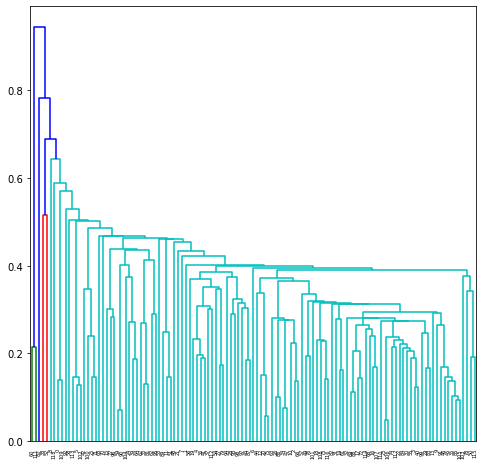

In [72]:
dendrogram(merg)
plt.show()

#### Complete Linkage

In [73]:
#Complete linkage
merg = linkage(pca_components_df,method='complete',metric='euclidean')

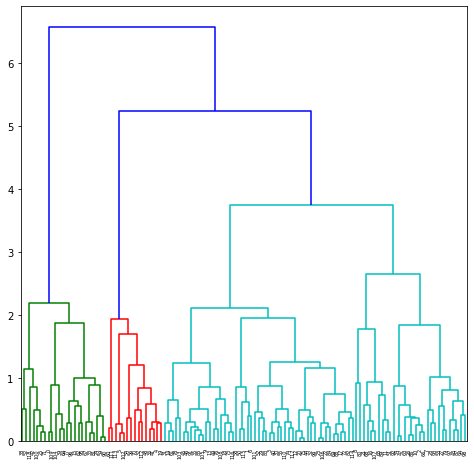

In [74]:
dendrogram(merg)
plt.show()

In [75]:
pca_hc = pca_components.copy()
pca_hc = pca_components.drop('Cluster_Id',axis=1)
pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [76]:
# We cut tree horizontally to get 4 clusters
cluster_cut = pd.Series(cut_tree(merg,n_clusters=4).reshape(-1,))
pca_hc = pd.concat([pca_hc,cluster_cut],axis=1)
pca_hc.columns = ['country','PC_1','PC_2','PC_3','Cluster_Id']

In [77]:
pca_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


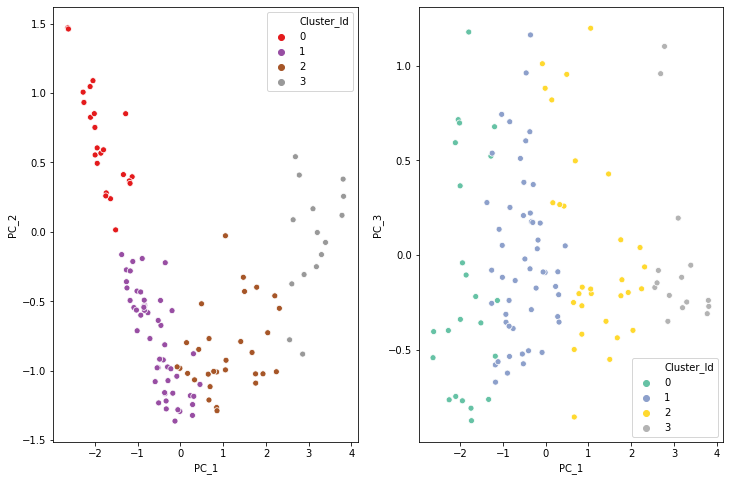

In [78]:
#Scatter plot to visualize 
fig, axes = plt.subplots(1,2, figsize=(12,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=pca_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set2",data=pca_hc,ax=axes[1])
plt.show()

In [79]:
#Merging df pca with original dataframe

df_merge_hc = pd.merge(country_df,pca_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

In [80]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,1
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


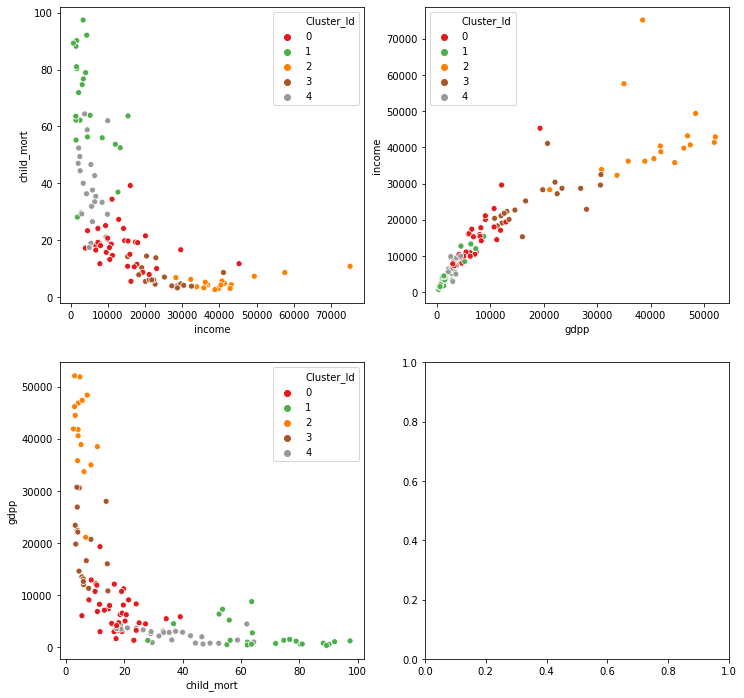

In [81]:
#Scatter plot to check data scatter
fig, axes = plt.subplots(2,2, figsize=(12,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
plt.show()

In [82]:
#List of countries with cluster 1 
df_merge_col[df_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Algeria,27.3,1712.64,1400.44,185.982,12900,16.10,76.5,2.89,4460,0
3,Armenia,18.1,669.76,1458.66,141.680,6700,7.77,73.3,1.69,3220,0
6,Azerbaijan,39.2,3171.12,1208.88,343.392,16000,13.80,69.1,1.92,5840,0
11,Belarus,5.5,3099.42,3889.35,338.283,16200,15.10,70.4,1.49,6030,0
16,Brazil,19.8,1198.40,1321.60,1009.120,14500,8.41,74.2,1.80,11200,0
17,Bulgaria,10.8,3433.68,3625.20,469.908,15300,1.11,73.9,1.57,6840,0
21,Chile,8.7,4863.30,4037.70,1026.840,19400,8.96,79.1,1.88,12900,0
22,China,15.7,1199.28,1030.56,231.192,9530,6.94,74.6,1.59,4560,0
23,Colombia,18.6,993.75,1112.50,474.375,10900,3.86,76.4,2.01,6250,0
29,Dominican Republic,34.4,1237.15,1814.85,338.990,11100,5.44,74.6,2.60,5450,0


In [83]:
#List of countries with cluster 1 
df_merge_col[df_merge_col['Cluster_Id']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,1
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,1
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,1
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,1
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,1
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,1
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,1
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,1
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,1
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,1


In [105]:
df_merge_col[df_merge_col['Cluster_Id']==1].shape

(23, 11)

In [84]:
#List of countries with cluster 1 
df_merge_col[df_merge_col['Cluster_Id']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
4,Australia,4.8,10276.2,10847.1,4530.87,41400,1.160,82.0,1.93,51900,2
5,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,2
19,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,2
27,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,2
36,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,2
37,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,2
41,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,2
48,Iceland,2.6,22374.6,18142.7,3938.60,38800,5.470,82.0,2.20,41900,2
54,Italy,4.0,9021.6,9737.6,3411.74,36200,0.319,81.7,1.46,35800,2
56,Japan,3.2,6675.0,6052.0,4223.05,35800,-1.900,82.8,1.39,44500,2


In [85]:
#List of countries with cluster 1 
df_merge_col[df_merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
2,Antigua and Barbuda,10.3,5551.0,7185.8,735.66,19100,1.440,76.8,2.13,12200,3
7,Bahamas,13.8,9800.0,12236.0,2209.20,22900,-0.393,73.8,1.86,28000,3
8,Bahrain,8.6,14386.5,10536.3,1028.79,41100,7.440,76.0,2.16,20700,3
10,Barbados,14.2,6320.0,7792.0,1275.20,15300,0.321,76.7,1.78,16000,3
26,Croatia,5.5,5076.0,5143.5,1047.60,20100,0.821,76.3,1.55,13500,3
28,Czech Republic,3.4,13068.0,12454.2,1560.24,28300,-1.430,77.5,1.51,19800,3
34,Estonia,4.5,10964.6,10030.2,880.38,22700,1.740,76.0,1.72,14600,3
43,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,3
47,Hungary,6.0,10715.8,10021.5,960.23,22300,2.330,74.5,1.25,13100,3
53,Israel,4.6,10710.0,10067.4,2334.78,29600,1.770,81.4,3.03,30600,3


In [106]:
df_merge_col[df_merge_col['Cluster_Id']==3].shape

(19, 11)

In [107]:
df_merge_col[df_merge_col['Cluster_Id']==4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,4
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,4
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,4
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,4
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,4
20,Cape Verde,26.5,1082.37000,2045.580000,135.3790,5830,0.505,72.5,2.67,3310,4
31,Egypt,29.1,553.80000,691.600000,121.1600,9860,10.100,70.5,3.19,2600,4
35,Fiji,24.1,2109.70000,2332.350000,177.3900,7350,4.230,65.3,2.67,3650,4
45,Guatemala,35.4,730.14000,1027.290000,193.8550,6710,5.140,71.3,3.38,2830,4
46,Guyana,37.6,1562.56000,2404.640000,163.5520,5840,5.730,65.5,2.65,3040,4


#### After analizing both KMeans and Hieararchical clustering, both gave different clusters. K- Means looks good comparitively. We can proceed with that

# Final Analysis

We have cluster 1 and cluster 4 those need aid

In [86]:
cluster_1_df = df_merge_col[df_merge_col['Cluster_Id'] ==1]

In [87]:
cluster_4_df = df_merge_col[df_merge_col['Cluster_Id'] ==4]

In [88]:
appended = cluster_1_df.append(cluster_4_df)

In [89]:
appended.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,1
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,1
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,1
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,1
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,1


In [90]:
#Rough check for outliers, statistics - Mean value
appended.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,52.195833,909.261090,1048.501814,132.997646,5063.333333,8.571063,65.847917,3.712917,2290.312500,2.562500
std,22.113152,1048.637238,902.618758,138.039323,3530.379000,5.818622,4.934852,1.053311,1890.981003,1.514557
min,17.400000,1.076920,0.651092,12.821200,700.000000,0.505000,54.300000,2.330000,327.000000,1.000000
25%,33.450000,133.135500,290.741500,44.516700,2357.500000,3.852500,62.650000,2.700000,781.750000,1.000000
50%,52.450000,503.940000,694.120000,78.535500,4260.000000,7.785000,66.150000,3.505000,1430.000000,4.000000
75%,64.025000,1157.782500,1698.300000,167.011500,6507.500000,11.075000,69.675000,4.570000,3160.000000,4.000000
max,97.400000,5048.750000,3257.550000,650.832000,15400.000000,23.600000,75.800000,6.150000,8750.000000,4.000000


In [91]:
#Based on above mean values will create new final dataframe
end_df = country_df[country_df['child_mort']>52]
end_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575


In [92]:
end_df.shape

(50, 10)

In [93]:
end_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,91.398000,871.798758,105.039414,797.803402,3855.460000,11.583100,59.702000,4.843400,1867.36000
std,32.751747,2238.737586,158.503478,1521.187142,5395.943772,15.094086,6.583668,1.176872,2871.81833
min,52.400000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.00000
25%,63.625000,102.121250,32.653825,192.802500,1395.000000,3.940000,56.875000,4.127500,555.25000
50%,88.750000,188.290000,48.726500,339.306000,2010.000000,8.855000,60.250000,5.035000,932.00000
75%,111.000000,446.625000,81.591000,591.472500,3915.000000,15.575000,63.950000,5.527500,1432.50000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.00000


In [94]:
# will create final list for income  less than mean
end_df_1 = end_df[end_df['income']<=3855]
end_df_1.shape

(37, 10)

In [95]:
end_df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,96.540541,183.451025,55.577451,345.602165,1799.540541,8.560405,58.908108,5.128649,832.918919
std,33.300187,158.800573,55.506056,278.748423,817.226563,6.540476,7.133815,1.026735,590.248506
min,52.400000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.000000
25%,71.900000,79.200000,31.078000,170.200000,1220.000000,2.970000,56.300000,4.610000,482.000000
50%,90.300000,131.274000,41.917400,254.560000,1610.000000,6.810000,58.800000,5.200000,662.000000
75%,111.000000,200.169000,56.600000,403.000000,2180.000000,12.300000,62.800000,5.710000,1000.000000
max,208.000000,617.320000,328.320000,1190.510000,3720.000000,26.500000,71.100000,7.490000,3600.000000


In [96]:
end_df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310


In [97]:
# Will follow same procedure for gdp < mean
end_df_2 = end_df_1[end_df_1['gdpp'] < 832]
end_df_2.shape

(24, 10)

In [98]:
end_df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446


In [99]:
end_df_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,102.195833,105.593583,34.770021,223.840083,1330.541667,7.949792,57.870833,5.335417,530.250000
std,35.812707,48.626875,12.364245,94.429336,417.792020,5.393248,7.169894,0.925132,149.731717
min,52.400000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.330000,231.000000
25%,80.825000,67.428000,26.701850,168.091000,1002.000000,3.645000,56.050000,4.840000,417.500000
50%,92.050000,103.951000,34.970150,193.061000,1390.000000,7.225000,58.350000,5.325000,550.000000
75%,116.000000,132.427750,42.675750,279.702000,1557.500000,11.725000,61.025000,5.832500,651.500000
max,208.000000,196.344000,59.115000,432.468000,2110.000000,20.800000,69.600000,7.490000,769.000000


#### Final list of country

In [100]:
end_df_2['country']

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
31     Central African Republic
36                      Comoros
37             Congo, Dem. Rep.
50                      Eritrea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
112                       Niger
126                      Rwanda
132                Sierra Leone
146                  Tajikistan
147                    Tanzania
150                        Togo
155                      Uganda
Name: country, dtype: object

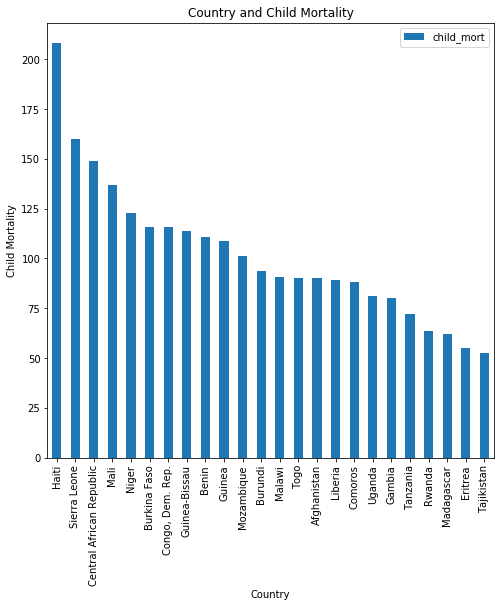

In [101]:
#Plot bar graphs for each attributes and countries which are in need

#For Child_mortality
aid = pd.DataFrame(end_df_2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
aid.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country")
plt.ylabel("Child Mortality")
plt.show()

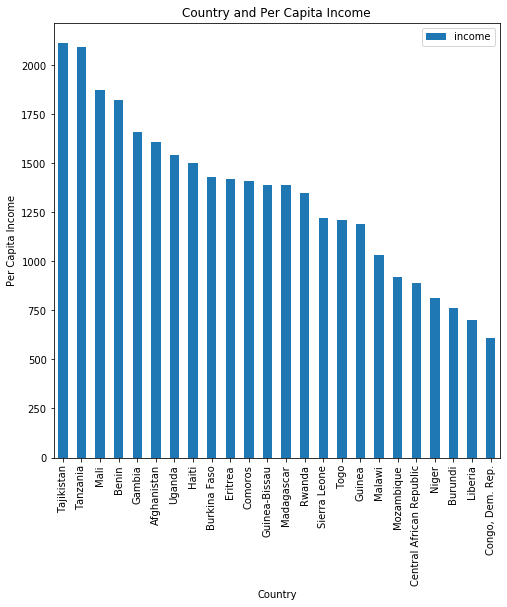

In [102]:
#Income
aid = pd.DataFrame(end_df_2.groupby(['country'])['income'].mean().sort_values(ascending = False))
aid.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country")
plt.ylabel("Per Capita Income")
plt.show()

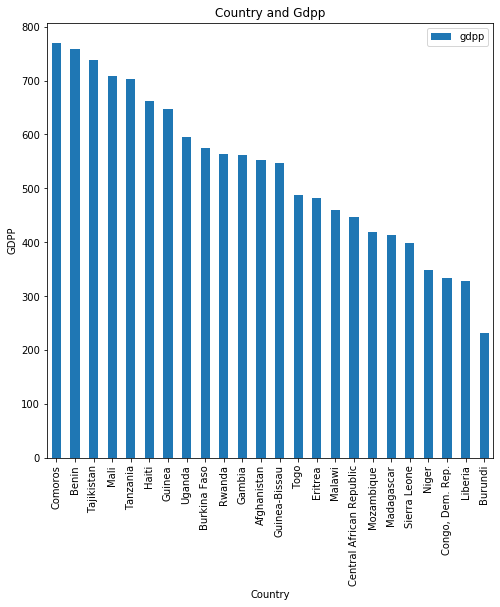

In [103]:
#GDP analysis plot
aid = pd.DataFrame(end_df_2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
aid.plot.bar()
plt.title('Country and Gdpp')
plt.xlabel("Country")
plt.ylabel("GDPP")
plt.show()


# Conclusion

### Final list of countries in need

In [104]:
end_df_2.reset_index(drop=True).country

0                  Afghanistan
1                        Benin
2                 Burkina Faso
3                      Burundi
4     Central African Republic
5                      Comoros
6             Congo, Dem. Rep.
7                      Eritrea
8                       Gambia
9                       Guinea
10               Guinea-Bissau
11                       Haiti
12                     Liberia
13                  Madagascar
14                      Malawi
15                        Mali
16                  Mozambique
17                       Niger
18                      Rwanda
19                Sierra Leone
20                  Tajikistan
21                    Tanzania
22                        Togo
23                      Uganda
Name: country, dtype: object